<div style="text-align:center; font-family: Times New Roman, serif;">
  <span style="background-color:Teal; color:WHITE; font-family: Times New Roman, serif; font-weight: bold; padding: 60px; height: 50px;">
    <span class="cm-header cm-header-1">WALK RUN CLASSIFICATION</span>
  </span>
</div>


<span style="color:blue">
<span class="cm-header cm-header-2">
Using motion sensors data, predict whether a person is walking or running.</span>

<div style="font-family: Calibri; font-size: 14pt; line-height: 1.5;"">
                                                                      
Using multiple python-based ML and data science libraries,we identified a suitable model to predict whether the person is running or walking
<br>
<br>
<div style="font-family: Calibri; font-size: 16pt;">
The following pipeline is followed:
<br>
<span style="font-family: Calibri; font-weight: bold; font-size: 14pt;">
    1. Problem Statement<br>
    2. Data<br>
    3. Evaluation Metrics<br>
    4. Domain Analysis<br>
    5. EDA<br>
    6. Data Pre-Processing<br>
    7. Modelling<br>
    8. Model Comparison Report<br>
    9. Report on challanges faced<br>
   10. Conclusion</span>

</div>
<br>
<br>

<span style="color:Green">
<span class="cm-header cm-header-2">
1. Problem Statement


<div style="font-family: Calibri; font-size: 14pt; line-height: 1.5;"">
Task 1:-Prepare a complete data analysis report on the given data.</br>
Task 2:-Create a predictive model to classify whether a person is running or walking based on the given predictor variables.<br>
                                                                      </div>


<span style="color:Green">
<span class="cm-header cm-header-2">
2. Dataset


<div style="font-family: Calibri; font-size: 14pt; line-height: 1.5;"">
This dataset is taken from kaggle.<br>



<span style="color:Green">
<span class="cm-header cm-header-2">
3. Evaluation Metrics


<div style="font-family: Calibri; font-size: 14pt; line-height: 1.5;"">

-  By looking at the activity column, we understand that the project falls in  binary classification type.<br>
-  activity column is having two unique values i.e., 0 & 1, considering <u>running as "1"</u> and <u>walking as "0"</u>.<br>
-  For classification problems, we use different metrics such as <u>Accuracy, Precision, Recall, F1 score, ROC-AUC score</u>, etc. Many metrics are based on the Confusion Matrix, since it encloses all the relevant information about the algorithm and classification rule performance.<br>
-  For this dataset we need to predict whether a person is walking or running, we will primarily look at <span style="background-color: yellow;">"Accuracy score"</span> in this case.<br>
                                                                      

<span style="color:Green">
<span class="cm-header cm-header-2">
4. Domain Analysis


<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">

-  Various features will be identified and detailed
-  The dataset comprises the readings of motion sensors recorded while users executed typical daily activities. The detailed format is described in the package. The attributes correspond to raw sensor readings. There are a total of 11 attributes. 

<div style="font-family: Calibri; font-size: 14pt; line-height: 1.5;"">
  1. date - date represents records collected from Jun-30, 2017 to July-17, 2017.<br>
  2. time - time represents the frequency of sensors data recorded.<br>
  3. username - refers to the different users whose data was collected. For current dataset, we have only one user "viktor".<br>
  4. wrist - refers to the hand on which the device was worn while recording, it can take only two values i.e., 0 for "left" and 1 for "right".<br>
  5. activity - refers to the physical activity being performed during recording, 0 for "walk" and 1 for "run".<br>
  6. acceleration_x - typically refers to the acceleration of an object in the x-axis direction (horizontal axis) as it moves. In the context of walk run classification, acceleration_x can be used to measure the acceleration of a person's body in the horizontal direction while they are walking or running.<br>
  7. acceleration_y - typically refers to the acceleration of an object in the y-axis direction (vertical axis) as it moves. In the context of walk run classification, acceleration_y can be used to measure the acceleration of a person's body in the vertical direction while they are walking or running.<br>
  8. acceleration_z - typically refers to the acceleration of an object in the z-axis direction (perpendicular to the ground) as it moves. In the context of walk run classification, acceleration_z can be used to measure the acceleration of a person's body in the forward-backward direction while they are walking or running.<br>                                                                  
  9. gyro_x -  typically refers to the angular velocity of an object around the x-axis (horizontal axis) as it moves. In the context of walk run classification, gyro_x can be used to measure the rotational motion of a person's body in the horizontal direction while they are walking or running.<br>                                                             
 10. gyro_y -  typically refers to the angular velocity of an object around the y-axis (vertical axis) as it moves. In the context of walk run classification, gyro_y can be used to measure the rotational motion of a person's body in the vertical direction while they are walking or running.<br>
 11. gyro_z -  typically refers to the angular velocity of an object around the z-axis (perpendicular to the ground) as it moves. In the context of walk run classification, gyro_z can be used to measure the rotational motion of a person's body in the forward-backward direction while they are walking or running.<br>                                                                  

<span style="color:Maroon">
<span class="cm-header cm-header-2">
Preparing the Tools


<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">
-  we're going to use several libraries to build our model, some of them are listed below:


In [1]:
#basics libraries
import numpy as np
import pandas as pd
from scipy import stats

#visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns


#data preprocessing
from sklearn. model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler


#model development
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

#performance metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score,precision_score,f1_score,roc_auc_score,roc_curve,confusion_matrix,classification_report


#hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

#warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Importing Data
data=pd.read_csv('walkrun.csv')

<span style="color:Maroon">
<span class="cm-header cm-header-2">
Basic Checks

In [3]:
data.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [4]:
data.tail()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755
88587,2017-7-9,20:9:16:117410004,viktor,0,0,0.3140,-0.8008,-0.0911,0.1183,1.0850,1.2814


In [5]:
data.shape

(88588, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


<div style="font-family: Calibri; font-size: 14pt; line-height: 1.5;"">

-  There are total 88,588 records of sensor data.
-  Each datapoint represents sensors data collected wrt time.
-  Dataset contains mixed data types ie., float64(6), int64(2) & object(3).


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
wrist,88588.0,0.522170,0.499511,0.0000,0.000000,1.0000,1.000000,1.0000
activity,88588.0,0.500801,0.500002,0.0000,0.000000,1.0000,1.000000,1.0000
acceleration_x,88588.0,-0.074811,1.009299,-5.3505,-0.381800,-0.0595,0.355500,5.6033
acceleration_y,88588.0,-0.562585,0.658458,-3.2990,-1.033500,-0.7591,-0.241775,2.6680
acceleration_z,88588.0,-0.313956,0.486815,-3.7538,-0.376000,-0.2210,-0.085900,1.6403
gyro_x,88588.0,0.004160,1.253423,-4.4306,-0.920700,0.0187,0.888800,4.8742
gyro_y,88588.0,0.037203,1.198725,-7.4647,-0.644825,0.0393,0.733700,8.4980
gyro_z,88588.0,0.022327,1.914423,-9.4800,-1.345125,0.0069,1.398200,11.2662


<div style="font-family: Calibri; font-size: 14pt; line-height: 1.5;"">

-  From this we found 
      1. Negative readings of sensors represents direction on movement.
      2. In our case we need to predict walk or run, so direction of motion can be ignored.
      3. There is no variance in Standard deviation.
-  For binary variables, "mean" can give valuable information on skewness. Mean values of "wrist" and "activity" are roughly around 0.5 indicating the sample collection is not heavily skewed towards one of the values.
-  The remaining six features are (x,y,z) acceleration & orientation values measured by the device, and they are ratio features.
-  Percentile & mean values provide a decent understanding of the skewness for ratio features. If mean is closer to 25th or 75th percentiles more than 50th percentile, that indicates an underlying skewness in the distribution.
-  "acceletation_y", "acceleration_z" have skewness in their distribution.


In [8]:
data.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">

-  dataset is having no null values.


In [9]:
data.columns

Index(['date', 'time', 'username', 'wrist', 'activity', 'acceleration_x',
       'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')

In [10]:
data.activity.value_counts()

1    44365
0    44223
Name: activity, dtype: int64

In [11]:
data.wrist.value_counts()

1    46258
0    42330
Name: wrist, dtype: int64

In [12]:
data.username.unique()

array(['viktor'], dtype=object)

In [13]:
data.date.value_counts()

2017-7-16    20480
2017-7-17    11365
2017-7-6     11357
2017-7-15     7934
2017-7-9      7788
2017-7-11     6696
2017-7-10     4337
2017-7-1      4201
2017-6-30     3992
2017-7-2      3933
2017-7-7      3280
2017-7-4      3225
Name: date, dtype: int64

In [14]:
data.date.nunique()

12

In [15]:
data.time.value_counts()

13:51:15:847724020    1
19:34:29:79468011     1
19:34:37:706730008    1
19:34:37:506595015    1
19:34:37:307013988    1
                     ..
14:45:22:828522980    1
14:45:22:629136979    1
14:45:22:429431974    1
14:45:22:229138970    1
20:9:16:117410004     1
Name: time, Length: 88588, dtype: int64

In [16]:
data.time.nunique()

88588

<div style="font-family: Calibri; font-size: 14pt; line-height: 1.5;"">

-  This dataset represents single user "victor".<br>
-  date is having 12 nunique values from Jun 30, 2017 to July 17, 2017.
-  time is having 88588 nunique values.
-  activity column is having two unique values i.e., 0 & 1, considering them running as '1' and walking as '0'.
-  wrist column is having two unique values i.e., 0 & 1, considering them right as '1' and left as '0'.
-  This comes under classification algorithm and it is slightly imbalanced wrt activity and wrist.
-  For running we have 44365 records and 44223 for walking.
-  For left & right wrist we have 42330 and 46258 records respectively.


<span style="color:Green">
<span class="cm-header cm-header-2">
5. Exploratory Data Analysis


<span style="color:Maroon">
<span class="cm-header cm-header-3">
Univariate Analysis

In [17]:
data.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


<div style="font-family: Calibri; font-size: 14pt; line-height: 1.5;"">

-  Before we do further data analysis, let's create a datetime object using string format "date", "time" columns, then index and sort the dataframe using that object.

In [18]:
# date column reformat
data_dt_fr = data["date"].str.split("-", expand=True)

#time column reformat
data_time_fr = data["time"].str.split(":", expand=True)

#join formatted date and time dataframes
data_dt_time_fr = pd.concat([data_dt_fr, data_time_fr], axis=1)
data_dt_time_fr.columns = ["year","month", "day", "hour", "minute", "second", "ns"] #rename columns

data_dt_time_fr

,year,month,day,hour,minute,second,ns
0,2017,6,30,13,51,15,847724020
1,2017,6,30,13,51,16,246945023
2,2017,6,30,13,51,16,446233987
3,2017,6,30,13,51,16,646117985
4,2017,6,30,13,51,16,846738994
...,...,...,...,...,...,...,...
88583,2017,7,9,20,9,15,317911028
88584,2017,7,9,20,9,15,517889022
88585,2017,7,9,20,9,15,717828989
88586,2017,7,9,20,9,15,917932987


In [19]:
#create a datetime object
data_dt_time_obj = pd.to_datetime(data_dt_time_fr)
#add datetime object to a new dataframe and set it as index
data_sorted = data.copy()
data_sorted["datetime"] = data_dt_time_obj
data_sorted.set_index("datetime", inplace=True)
print("* last row timestamp before sorting *")
print(data_sorted.index[-1])

* last row timestamp before sorting *
2017-07-09 20:09:16.117410004


In [20]:
#sort df_sorted data by "datetime" index
data_sorted.sort_index(inplace=True)
print("* last row timestamp after sorting *")
print(data_sorted.index[-1])

* last row timestamp after sorting *
2017-07-17 20:16:03.684989988


<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">

-  Looks like the original dataset was infact not sorted by datetime. Newly created dataframe "df_sorted" is sorted by datetime.

In [21]:
print("* dataframe with datetime index *")
data_sorted.head()

* dataframe with datetime index *


,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
datetime,,,,,,,,,,,
2017-06-30 13:51:15.847724020,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
2017-06-30 13:51:16.246945023,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2017-06-30 13:51:16.446233987,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
2017-06-30 13:51:16.646117985,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
2017-06-30 13:51:16.846738994,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


<div style="font-family: Calibri; font-size: 14pt; line-height: 1.5;"">

-  Let's get some more information on when the samples were recorded.

-  Time feature analysis can help us draw important insights into activity patterns among different users like hours/days when they are most active.

In [22]:
print("Start time of data recording ->", data_sorted.index.min())
print("End time of data recording ->", data_sorted.index.max())
print("Number of days of data collection ->", data_sorted.index.day.nunique())
print("Days of data collection ->", data_sorted.date.unique())

Start time of data recording -> 2017-06-30 13:51:15.847724020
End time of data recording -> 2017-07-17 20:16:03.684989988
Number of days of data collection -> 12
Days of data collection -> ['2017-6-30' '2017-7-1' '2017-7-2' '2017-7-4' '2017-7-6' '2017-7-7'
 '2017-7-9' '2017-7-10' '2017-7-11' '2017-7-15' '2017-7-16' '2017-7-17']


<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">

Data was collected on 12 days printed above between June 30, 2017 and July 17, 2017

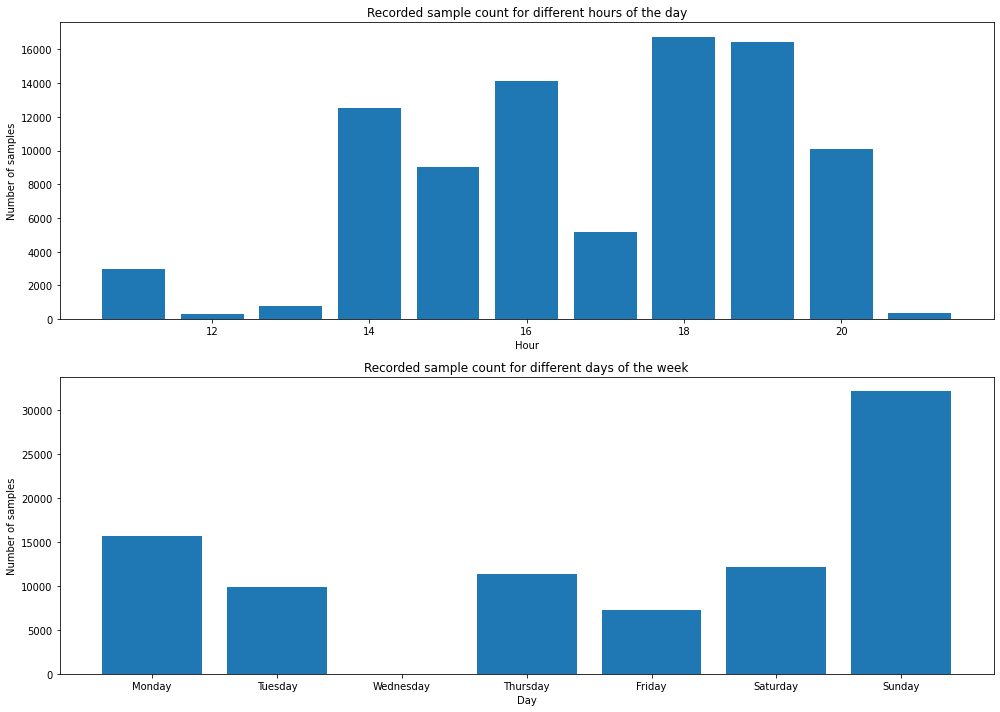

In [23]:
f, ax =  plt.subplots(ncols=1, nrows=2, figsize = (14,10))

#sample count vs hour of day
hr = np.unique(data_sorted.index.hour, return_counts = True)
ax[0].bar(hr[0], hr[1])
ax[0].set_title("Recorded sample count for different hours of the day")
ax[0].set_xlabel("Hour")
ax[0].set_ylabel("Number of samples")

#sample count vs day of week
day = np.unique(data_sorted.index.dayofweek, return_counts = True)
ax[1].bar(day[0], day[1])
ax[1].set_title("Recorded sample count for different days of the week")
ax[1].set_xlabel("Day")
ax[1].set_ylabel("Number of samples")
ax[1].set_xticklabels(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


f.tight_layout()
f.show()

<div style="font-family: Calibri; font-size: 14pt; line-height: 1.5;"">

-  Observations on data collection timline:

-  Hours of day: Most of the samples were recorded between 2pm and 8pm with the highest count coming from 6pm. The dip in sample count at 5pm looks out of place and worth noting.
-  Days of week: Sunday dominates the sample count which could be due to it being no work day. Rest of the days have similar sample counts except for Wednesday which has zero.

In [24]:
df_wrist=data['wrist'].replace({0:'left',1:'right'})

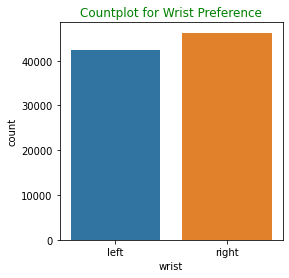

In [25]:
plt.figure(figsize=(4,4))

sns.countplot(df_wrist)
plt.title("Countplot for Wrist Preference",color='green')
plt.show()

<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">

-  for right wrist more number of records found compared with left wrist.

In [26]:
df_activity=data['activity'].replace({0:'walking',1:'running'})

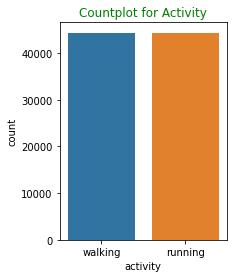

In [27]:
plt.figure(figsize=(3,4))

sns.countplot(df_activity)
plt.title("Countplot for Activity",color='green')
plt.show()

<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">

-  almost same number of records found for both walking and running.

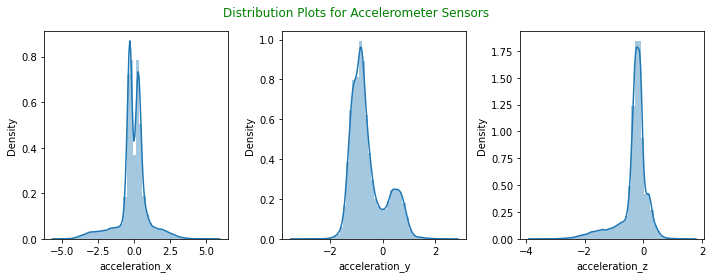

In [28]:
plt.figure(figsize=(10,7))
           
           
plotnumber=1
for i in data.columns[5:8]:
    plt.subplot(2,3,plotnumber)
    sns.distplot(data[i])
    plotnumber+=1
plt.suptitle("Distribution Plots for Accelerometer Sensors",color='green')

plt.tight_layout()

<div style="font-family: Calibri; font-size: 14pt; line-height: 1.5;"">

- For x-axis, data is roughly symmetric and the double peak pattern is because of two "wrist" values.<br>
- For y-axis & z-axis data is slightly skeewed and the double peak pattern is because of two "wrist" values.

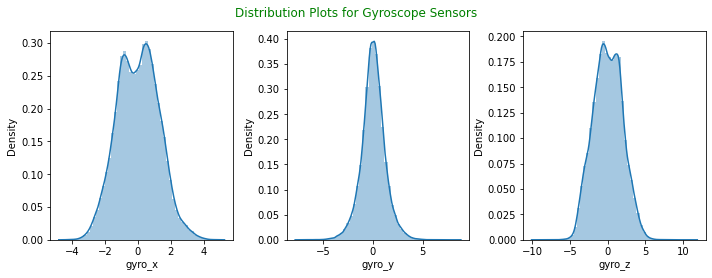

In [29]:
plt.figure(figsize=(10,7))
           
           
plotnumber=1
for i in data.columns[8:]:
    plt.subplot(2,3,plotnumber)
    sns.distplot(data[i])
    plotnumber+=1
plt.suptitle("Distribution Plots for Gyroscope Sensors",color='green')

plt.tight_layout()

<div style="font-family: Calibri; font-size: 14pt; line-height: 1.5;"">
- For x-axis, gyroscope data double peek pattern is observed because of two wrist values.<br>
- For y-axis, gyroscope data has normal distribution.<br>
- For z-axis, gyroscope data looks symmetric.<br>

<span style="color:Maroon">
<span class="cm-header cm-header-3">
Bivariate Analysis

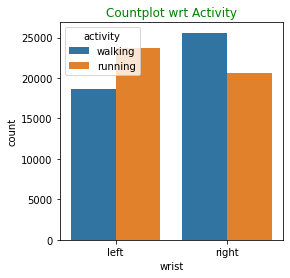

In [30]:
plt.figure(figsize=(4,4))

sns.countplot(x=df_wrist,hue=df_activity)
plt.title("Countplot wrt Activity",color='green')
plt.show()

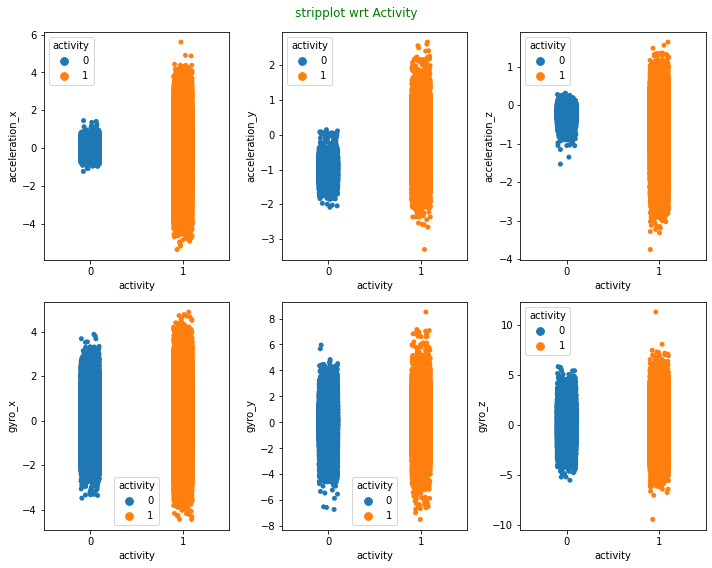

In [31]:
plt.figure(figsize=(10,8))
plotnumber=1
for i in data.columns[5:]:
    plt.subplot(2,3,plotnumber)
    sns.stripplot(data=data,x='activity',y=i,hue='activity')
    plotnumber+=1
plt.suptitle("stripplot wrt Activity",color='green')

plt.tight_layout()

<div style="font-family: Calibri; font-size: 14pt; line-height: 1.5;"">

-  "acceleration_x", "acceleration_z" show clear differentiation between walking and running, with running yielding much higher(+ve, -ve based on the wrist motion) values.
-  "acceleration_y" shows some separation but not as pronounced as the two other dimensions.
-  gyroscope almost has similar values.

<span style="color:Maroon">
<span class="cm-header cm-header-3">
Multi-variate Analysis

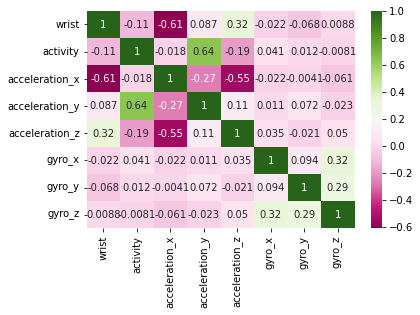

In [32]:
sns.heatmap(data.corr(), cmap='PiYG', annot=True)
plt.show()


<div style="font-family: Calibri; font-size: 14pt; line-height: 1.5;"">

- For predictive analysis, acceleration_y could be the most important feature because of it's data distribution quality and ability to differentiate "activity"<br>
- It's positive to see that data distribution of all sensor axes is either symmetrical or close to equal.<br>
- Regarding the sensor data presented in the dataset, one can make a conclusion that the data presented doesn't suffer from skewing and normally distributed.<br>

<span style="color:Green">
<span class="cm-header cm-header-2">
6. Data Pre-Processing

<span style="color:Maroon">
<span class="cm-header cm-header-4">
Handling Missing values

In [33]:
data.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">

-  as this is subset of original data no NaN values found in this dataset.

In [34]:
data.duplicated().sum()

0

<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">

- No Duplicates found in the dataset.

<span style="color:Maroon">
<span class="cm-header cm-header-4">
Handling Outliers

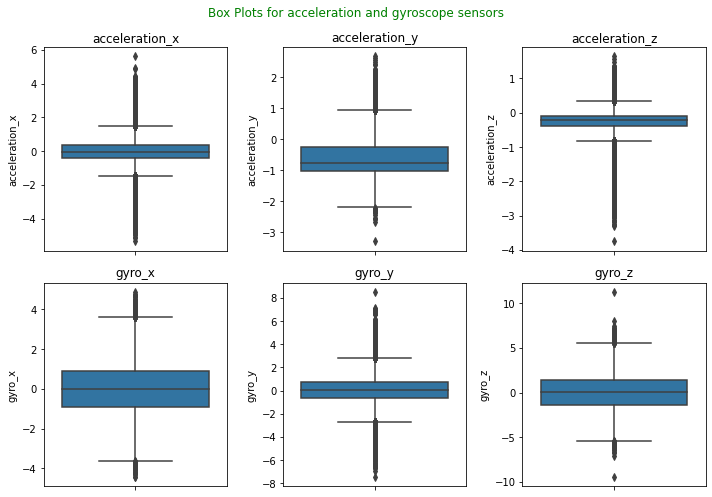

In [35]:
plt.figure(figsize=(10,7))
plotnumber=1
for i in data.columns[5:]:
    plt.subplot(2,3,plotnumber)
    sns.boxplot(y=data[i])
    plt.title(i)
    plotnumber+=1
plt.suptitle("Box Plots for acceleration and gyroscope sensors",color='green')

plt.tight_layout()

<div style="font-family: Calibri; font-size: 14pt; line-height: 1.5;"">

-  as we know all these sensors data collected wrt date and time, records showing above and lower fence represents they are in clusters, no need to impute them.

<span style="color:Maroon">
<span class="cm-header cm-header-4">
Declaring Features and Target

<div style="font-family: Calibri; font-size: 14pt; line-height: 1.5;"">
-  as we have to predict walk run, we will choose only acceleraion and gyroscope records in x because all records belongs to single user so we can drop 'username'<br>
-  date and time features not that important as dataset is very small, dropping date and time.<br>                              -  almost same count of records found for wrist, even this feature does't show much effect on the activity, we can drop wrist.<br>           
-  let's first seperate the sensors data and activity from the dataset.

In [36]:
x=data.iloc[:,5:]
y=data['activity']

In [37]:
print(x.shape, y.shape)

(88588, 6) (88588,)


<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">
splitting the dataset, Let's use standard froms of x_train, x_test, y_train, y_test

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(70870, 6)
(17718, 6)
(70870,)
(17718,)


<span style="color:Maroon">
<span class="cm-header cm-header-3">SCALING

In [39]:
#scaling the data usning StandardScaler technique.
scaler = StandardScaler()
scaler.fit(x_train)
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)


In [40]:
X_train

array([[-3.52556564e-01, -5.81810235e-01,  3.18432322e-01,
         4.07375227e-01, -6.37590987e-03, -7.00198693e-01],
       [-3.49904193e+00,  1.66553473e+00,  1.90942401e+00,
         3.24072461e+00,  2.19586943e+00,  1.24352228e+00],
       [-3.99652217e-01,  9.42315953e-01, -1.24273856e+00,
        -1.52526346e-01, -1.13475734e-01, -5.50916024e-02],
       ...,
       [ 4.15846197e-01, -4.49998025e-01,  5.20802516e-01,
        -5.47450506e-01, -9.26715724e-02, -7.10424410e-01],
       [-4.05105398e-01, -1.80610450e-03,  7.64304864e-01,
         3.27959394e-01,  4.39665316e-01,  3.38911531e-01],
       [-4.13136446e-01,  1.49465016e+00,  3.45168222e-01,
         1.68896319e+00, -1.96942031e-01,  2.12945543e+00]])

In [41]:
X_test

array([[ 1.74007681,  0.14901017, -1.33919346,  0.23401725, -1.33875764,
        -0.89354822],
       [-0.03934568,  1.46941276,  0.20387927,  1.3972397 , -0.69424471,
         1.86807359],
       [ 2.27657066, -1.92471364, -3.91756249, -0.12371316, -0.29913207,
         1.43269804],
       ...,
       [-3.2097259 ,  2.05397787,  0.92286932,  2.31455243,  1.85892522,
         1.46473166],
       [ 0.27079159,  0.15341912,  0.93932218, -0.61872522, -0.10715127,
        -0.45979   ],
       [-0.48501929,  2.46446572,  0.44100614, -1.10950708, -0.50717369,
        -0.43260838]])

<span style="color:Green">
<span class="cm-header cm-header-2">
7. Modelling

##### LOGISTIC REGRESSION

In [42]:
#instantiating the model
lr= LogisticRegression()

#training the model
lr.fit(X_train,y_train)

#predicting
y_pred_lr= lr.predict(X_test)

print('classificationreport-\n',classification_report(y_test, y_pred_lr))
print('Accuracy_score -',accuracy_score(y_test,y_pred_lr))
lr_acc = accuracy_score(y_test,y_pred_lr)


classificationreport-
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      8913
           1       0.89      0.81      0.85      8805

    accuracy                           0.86     17718
   macro avg       0.86      0.86      0.86     17718
weighted avg       0.86      0.86      0.86     17718

Accuracy_score - 0.8556270459419799


##### DECISION TREE CLASSIFIER

In [43]:
# Create an instance of the decision tree model
tree = DecisionTreeClassifier()

# Fit the model to the training data
tree.fit(X_train, y_train)

# Make predictions on the test data
y_pred_tree= tree.predict(X_test)

print('classificationreport-\n',classification_report(y_test, y_pred_tree))
print('Accuracy_score -',accuracy_score(y_test, y_pred_tree))
tr_acc = accuracy_score(y_test,y_pred_tree)


classificationreport-
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      8913
           1       0.98      0.98      0.98      8805

    accuracy                           0.98     17718
   macro avg       0.98      0.98      0.98     17718
weighted avg       0.98      0.98      0.98     17718

Accuracy_score - 0.9826729879218874


##### RANDOM FOREST CLASSIFIER

In [44]:
#instantiating object
rf = RandomForestClassifier()

#fitting the model
rf.fit(X_train, y_train)

#predicting
y_pred_rf= rf.predict(X_test)

print('classificationreport-\n',classification_report(y_test, y_pred_rf))
print('Accuracy_score -',accuracy_score(y_test, y_pred_rf))
rf_acc = accuracy_score(y_test,y_pred_rf)


classificationreport-
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      8913
           1       0.99      0.99      0.99      8805

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718

Accuracy_score - 0.9902359182752004


###### ADA BOOST CLASSIFIER

In [45]:
#instantiating the object
ada_boost= AdaBoostClassifier()

#fitting the model
ada_boost.fit(X_train, y_train)

#predicting
y_pred_ada_boost=ada_boost.predict(X_test)

print('classificationreport-\n',classification_report(y_test, y_pred_ada_boost))
print('Accuracy_score -',accuracy_score(y_test, y_pred_ada_boost))
ab_acc = accuracy_score(y_test,y_pred_ada_boost)


classificationreport-
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      8913
           1       0.98      0.97      0.98      8805

    accuracy                           0.98     17718
   macro avg       0.98      0.98      0.98     17718
weighted avg       0.98      0.98      0.98     17718

Accuracy_score - 0.9754486962411107


##### XG BOOST CLASSIFIER

In [46]:
#instantiating the object
xgboost= XGBClassifier()

#fitting the model
xgboost.fit(X_train, y_train)

#predicting
y_pred_xgboost= xgboost.predict(X_test)

print('classificationreport-\n',classification_report(y_test, y_pred_xgboost))
print('Accuracy_score -',accuracy_score(y_test, y_pred_xgboost))
xg_acc = accuracy_score(y_test,y_pred_xgboost)


classificationreport-
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      8913
           1       0.99      0.99      0.99      8805

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718

Accuracy_score - 0.9913082740715656


###### K Nearest Neighbors

In [47]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate the estimator
knn = KNeighborsClassifier()

# fit the model
knn.fit(X_train, y_train)

# predict the response
y_pred_knn = knn.predict(X_test)

print('classificationreport-\n',classification_report(y_test, y_pred_knn))
print('Accuracy_score -',accuracy_score(y_test, y_pred_knn))
knn_acc = accuracy_score(y_test,y_pred_knn)


classificationreport-
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8913
           1       1.00      0.98      0.99      8805

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718

Accuracy_score - 0.9896715204876397


###### Support Vector Classifier

In [48]:
from sklearn.svm import SVC

# instantiate the estimator
svm = SVC()

# fit the model
svm.fit(X_train, y_train)

# predict the response
y_pred_svm = svm.predict(X_test)

print('classificationreport-\n',classification_report(y_test, y_pred_svm))
print('Accuracy_score -',accuracy_score(y_test, y_pred_svm))
svm_acc = accuracy_score(y_test,y_pred_svm)


classificationreport-
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      8913
           1       0.99      0.98      0.99      8805

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718

Accuracy_score - 0.9892200022575911


<span style="color:Green">
<span class="cm-header cm-header-2">
8. Model Comparison Report

In [49]:
models = pd.DataFrame([lr_acc, tr_acc, rf_acc, ab_acc, xg_acc, knn_acc, svm_acc],
             index=['Logistic Regression','Decision Tree','Random Forest','Ada Boost ','XG Boost', 'KNN', 'SVC'],columns=['Accuracy'])
models

,Accuracy
Logistic Regression,0.855627
Decision Tree,0.982673
Random Forest,0.990236
Ada Boost,0.975449
XG Boost,0.991308
KNN,0.989672
SVC,0.989220


In [50]:
models.Accuracy.sort_values(ascending=False)

XG Boost               0.991308
Random Forest          0.990236
KNN                    0.989672
SVC                    0.989220
Decision Tree          0.982673
Ada Boost              0.975449
Logistic Regression    0.855627
Name: Accuracy, dtype: float64

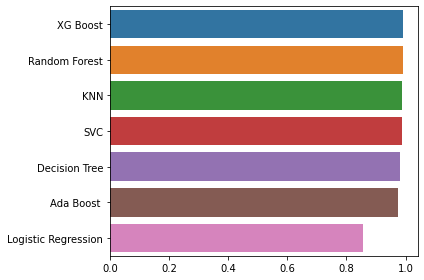

In [51]:
sns.barplot(x=models.Accuracy.sort_values(ascending=False).values,y = models.Accuracy.sort_values(ascending=False).index)
plt.tight_layout()

### HyperParameter Tuning

In [52]:
param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGB=XGBClassifier(random_state=42)
rcv= RandomizedSearchCV(estimator=XGB, scoring='f1',param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
rcv.fit(X_train, y_train)##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters 
print(f"Best paramters: {cv_best_params})")##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 51.2, 'reg_alpha': 0.1, 'n_estimators': 130, 'learning_rate': 0.6, 'gamma': 0.2})


In [56]:
XGB3=XGBClassifier(reg_lambda= 51.2, reg_alpha= 0.1, n_estimators=130, learning_rate=0.6, gamma=0.2)
XGB3.fit(X_train, y_train)#training 
y_predict=XGB3.predict(X_test)#testing
xg = accuracy_score(y_test,y_predict)
xg

0.9917033525228581

[CV] END gamma=12.8, learning_rate=0.300000012, n_estimators=50, reg_alpha=12.8, reg_lambda=1.6; total time=   7.7s
[CV] END gamma=25.6, learning_rate=0.1, n_estimators=100, reg_alpha=12.8, reg_lambda=12.8; total time=  13.1s
[CV] END gamma=6.4, learning_rate=0.1, n_estimators=115, reg_alpha=6.4, reg_lambda=3.2; total time=  15.1s
[CV] END gamma=12.8, learning_rate=0.2, n_estimators=80, reg_alpha=0.8, reg_lambda=3.2; total time=  10.3s
[CV] END gamma=0.4, learning_rate=0.6, n_estimators=80, reg_alpha=51.2, reg_lambda=0; total time=   6.6s
[CV] END gamma=25.6, learning_rate=0.4, n_estimators=50, reg_alpha=12.8, reg_lambda=1.6; total time=   7.1s
[CV] END gamma=3.2, learning_rate=0.03, n_estimators=150, reg_alpha=25.6, reg_lambda=12.8; total time=  22.7s
[CV] END gamma=6.4, learning_rate=0.7, n_estimators=80, reg_alpha=0, reg_lambda=0.8; total time=  10.3s
[CV] END gamma=200, learning_rate=0.15, n_estimators=50, reg_alpha=25.6, reg_lambda=0.2; total time=   6.0s
[CV] END gamma=200, learn

In [53]:
param_grid = {'gamma': [0.00001,0.0001,0.001,0.01,0.1,0.09,0.009,0.3,0.35,0.2,0.33],
              'learning_rate': [0.35,0.4,0.45,0.5,0.55,0.6,0.66,0.7,0.75,0.8,0.85,0.9,0.10],
              'n_estimators': [100,110,120,125,130,135,140,145],
              'reg_alpha': [0.00001,0.0001,0.001,0.01,0.1,0.09,0.009],
              'reg_lambda': [30.5,40.0,40.5,50.5,0.0,51.0,51.5,52.0,52.5,53,53.0,53.5,54.0]}

XGB=XGBClassifier(random_state=42)
rcv= RandomizedSearchCV(estimator=XGB, scoring='f1',param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
rcv.fit(X_train, y_train)##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters 
print(f"Best paramters: {cv_best_params})")##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 53, 'reg_alpha': 0.009, 'n_estimators': 130, 'learning_rate': 0.75, 'gamma': 0.1})


In [54]:
XGB2=XGBClassifier(reg_lambda=53 , reg_alpha= 0.009, n_estimators=130, learning_rate=0.75, gamma=0.1)
XGB2.fit(X_train, y_train)#training 
y_predict=XGB2.predict(X_test)#testing
xg = accuracy_score(y_test,y_predict)
xg

0.991590472965346

<div style="font-family: Calibri; font-size: 14pt; line-height: 1.5;"">

- Almost all of the algorithms provide good accuracy. XGBoost is giving best accuracy score of 99.1%.

<span style="color:Green">
<span class="cm-header cm-header-2">
9. Reports on challenges faced

<div style="font-family: Calibri; font-size: 14pt; line-height: 1.5;"">

-  As this is subset of original walk run dataset, to predict walk run we require only acceleration data, gyroscope data may add advantage.
-  we used multiple models to predict walkrun correctly.
-  Not much challenges faced while handling this simple dataset.

<span style="color:Green">
<span class="cm-header cm-header-2">
10. Conclusion

<div style="font-family: Calibri; font-size: 14pt; line-height: 1.5;"">
                                                  
*  The walk/run classification dataset was analysed using XGBoost, yielding impressive accuracy of 99.1%, respectively. This high level of precision indicates that the model excels at distinguishing between walking and running activities.

*  Such precision has important practical applications in a variety of fields, including sports science, fitness tracking, and healthcare. Furthermore, the success of this model demonstrates the effectiveness of XGBoost in handling classification tasks as well as the significance of proper feature engineering in achieving high accuracy.
*  This suggests that the model could be useful in applications where real-time classification of walk and run activities is needed, such as in fitness tracking or health monitoring.